- After feature selection step 2 also build (Based on the models compatibility with the data i.e classification or regression problem) (also write a 3 lines on what you understand about these models you are free to use online resources but please cite them.)

- Perform visualization of your model performances, insights etc using apt metrics and charts (ex: MSE bar plots of all the models to identify best models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']

In [3]:
data = pd.read_csv("Clean_Data.csv")
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [4]:
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
34260,238569,2020-03-04 04:29:58,-0.012,8.584,8.574,-0.022,8.582,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
54082,910631,2020-06-08 19:14:57,-0.012,8.634,8.624,-0.020,8.638,61.175,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
9619,841702,2020-05-30 02:09:07,8.576,8.392,-0.010,2.052,8.392,75.900,5.7275,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
49064,952769,2020-06-14 02:20:04,-0.014,9.864,9.852,-0.022,9.862,69.500,3.9775,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
38094,1307031,2020-08-02 06:30:25,-0.012,9.008,8.996,-0.022,9.008,66.000,3.6525,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


# XGBOOST

- XGBoost, a Gradient Boosted decision tree implementation, excels in Kaggle Competitions. 
- It sequentially creates decision trees, assigning weights to variables that are adjusted based on prediction errors. 
- This ensemble method, with optimizations like the Approximate Greedy Algorithm and Cash-Aware Access, proves effective for regression, classification, ranking, and user-defined prediction problems.

reference: <BR>
https://xgboost.readthedocs.io/en/stable/python/python_intro.html <BR>
https://www.geeksforgeeks.org/xgboost/ <BR>
https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/ <BR>

In [5]:
#!pip install xgboost
import xgboost as xgb

In [6]:
X = data[selected_features]
y = data['status']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5979
           1       1.00      1.00      1.00      5910

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



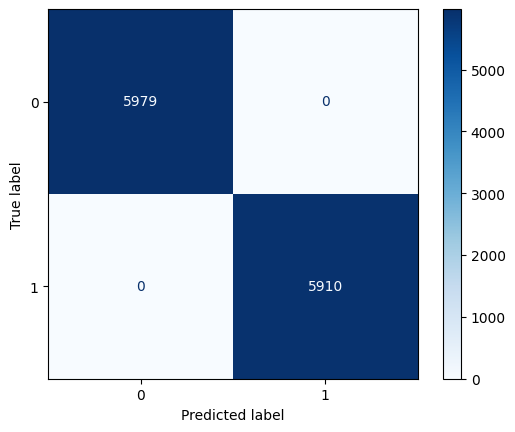

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()
